In [32]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

In [33]:
data_path = r"/Users/AdamHarris/Desktop/OmniglotData/Images"
list = os.listdir(data_path) 
num_samples = np.size(list)
print(num_samples)
list.sort()

10000


In [34]:
labels = np.loadtxt('/Users/AdamHarris/Desktop/OmniglotData/labels.csv', delimiter=',', skiprows=0)
labels = labels.astype(np.uint8)
print(labels)
print(len(labels))

[17  6 10 ... 14 19  1]
10000


In [35]:
im = Image.open(data_path + '/' + list[0])
np_im = np.array(im)
m, n = np_im.shape[0:2] # get the size of the images
num_images = len(list)
print(m, n, num_images)

500 500 10000


In [36]:
images = np.array([np.array(Image.open(data_path + '/' + fname)) for fname in list])

In [37]:
print(images.shape)

(10000, 500, 500)


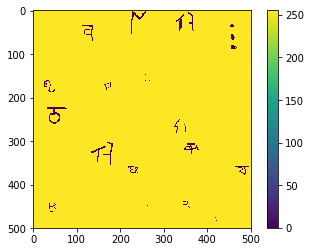

In [38]:
plt.figure()
plt.imshow(images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [40]:
x_test = x_test / 255.0
x_train = x_train / 255.0

<function matplotlib.pyplot.show(*args, **kw)>

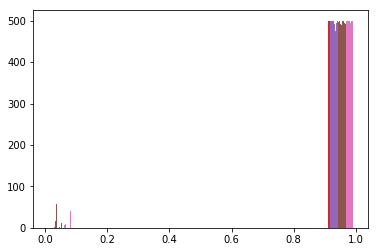

In [66]:
plt.hist(x_train[0])
plt.show

In [41]:
class_names = ['Zero Characters', 'One Character', 'Two Characters', 'Three Characters', 'Four Characters', 
               'Five Characters', 'Six Characters', 'Seven Characters', 'Eight Characters', 'Nine Characters',
               'Ten Characters', 'Eleven Characters', 'Twelve Characters', 'Thirteen Characters', 
               'Fourteen Characters', 'Fifteen characters', 'Sixteen Characters', 'Seventeen Characters', 
               'Eighteen Characters', 'Nineteen Characters', 'Twenty Characters', 'Twenty-one Characters',
               'Twenty-two Characters', 'Twenty-three Characters', 'Twenty-four Characters', 'Twenty-five Characters']

0
25


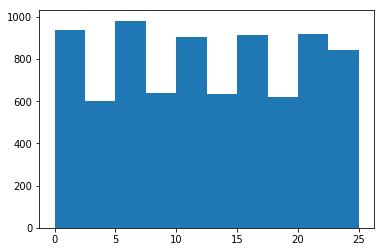

In [60]:
plt.hist(y_train)
print(min(y_train))
print(max(y_train))

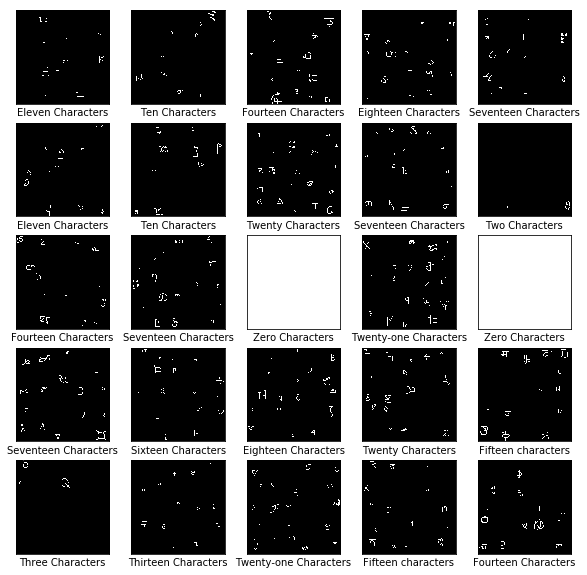

In [61]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [62]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(m,n)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(26, activation=tf.nn.softmax)
])

In [63]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
8000/8000 [==============================] - 246s 31ms/sample - loss: 15.4526 - acc: 0.0382
Epoch 2/10
8000/8000 [==============================] - 191s 24ms/sample - loss: 15.4976 - acc: 0.0385
Epoch 3/10
8000/8000 [==============================] - 195s 24ms/sample - loss: 15.4976 - acc: 0.0385
Epoch 4/10
8000/8000 [==============================] - 168s 21ms/sample - loss: 15.4976 - acc: 0.0385
Epoch 5/10
8000/8000 [==============================] - 153s 19ms/sample - loss: 15.4976 - acc: 0.0385
Epoch 6/10
8000/8000 [==============================] - 163s 20ms/sample - loss: 15.4976 - acc: 0.0385
Epoch 7/10
8000/8000 [==============================] - 167s 21ms/sample - loss: 15.4976 - acc: 0.0385
Epoch 8/10
8000/8000 [==============================] - 156s 19ms/sample - loss: 15.4976 - acc: 0.0385
Epoch 9/10
8000/8000 [==============================] - 177s 22ms/sample - loss: 15.4976 - acc: 0.0385
Epoch 10/10
8000/8000 [==============================] - 155s 19ms/sample

In [65]:
test_loss, test_acc = model.evaluate(x_test, y_test)

2000/2000 [==============================] - 13s 7ms/sample - loss: 15.4895 - acc: 0.0390
